In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score,precision_recall_curve,roc_curve,f1_score
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/added_var.csv")

In [3]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [4]:
df.head()

,Player1_Name,Player1_Height,Player1_Weight,Player1_turned_pro,Player1_age,Player1_Rank,Player1_country,Tournament,Location,Ground,Prize,GameRound,Start_Date,End_Date,Tornament_Days,Num_Sets,TotalPoints,GameId,Player2_Name,Player2_Height,Player2_Weight,Player2_turned_pro,Player2_age,Player2_Rank,Player2_country,Rank_Diff
0,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 16,2011-10-31,2011-11-06,6,2,15,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,86.0,9.0,29.0,64,Poland,63
1,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 32,2011-10-31,2011-11-06,6,3,30,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,83.0,13.0,31.0,47,Belgium,46
2,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,Semi-Finals,2010-11-01,2010-11-07,6,2,23,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F...",Viktor Troicki,193,86.0,4.0,24.0,32,Serbia,29
3,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,Quarter-Finals,2010-11-01,2010-11-07,6,2,17,"Basel_Basel, Switzerland_Hard_1225000.0_Quarte...",Robin Haase,191,71.0,5.0,23.0,66,Netherlands,63
4,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,Round of 32,2010-11-01,2010-11-07,6,2,18,"Basel_Basel, Switzerland_Hard_1225000.0_Round ...",Ernests Gulbis,191,88.0,6.0,22.0,26,Latvia,23


- Limpar numero de sets maior que 3 
- Map GameRound to integers
- Calculate the differences between 
    - Height
    - Weigh
    - Turned_pro
    - age	

## Limpar Numero de sets maior que 2

In [5]:
df = df[df.Num_Sets<=3]

In [6]:
df.Num_Sets.unique()

array([2, 3])

## Exluir Round Robin

In [7]:
df = df[df["GameRound"]!="Round Robin"]

## Mapping GameRound to integers 

In [8]:
df.GameRound.unique()

array(['Round of 16', 'Round of 32', 'Semi-Finals', 'Quarter-Finals',
       'Finals', '2nd Round Qualifying', '1st Round Qualifying',
       '3rd Round Qualifying'], dtype=object)

In [9]:
to_map = {'1st Round Qualifying': 0 , "2nd Round Qualifying": 1, "3rd Round Qualifying": 2, "Round of 32": 3, "Round of 16": 4, "Quarter-Finals": 5, "Semi-Finals": 6, "Finals":7}
df["GameRound"] = df["GameRound"].map(to_map)

In [10]:
df.head(2)

,Player1_Name,Player1_Height,Player1_Weight,Player1_turned_pro,Player1_age,Player1_Rank,Player1_country,Tournament,Location,Ground,Prize,GameRound,Start_Date,End_Date,Tornament_Days,Num_Sets,TotalPoints,GameId,Player2_Name,Player2_Height,Player2_Weight,Player2_turned_pro,Player2_age,Player2_Rank,Player2_country,Rank_Diff
0,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,4,2011-10-31,2011-11-06,6,2,15,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,86.0,9.0,29.0,64,Poland,63
1,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,3,2011-10-31,2011-11-06,6,3,30,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,83.0,13.0,31.0,47,Belgium,46


## Substituir Peso na pela Média dado que são só três

In [11]:
index_to_fill = df[df["Player2_Weight"].isna()]["Player2_Weight"].index
mean_of_height = round(df[~df["Player2_Weight"].isna()]["Player2_Weight"].astype(int).mean(),0)
df["Player2_Weight"].loc[index_to_fill] = mean_of_height

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_31728/3340511584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Player2_Weight"].loc[index_to_fill] = mean_of_height


## Calculate the differences 

In [12]:
df["Height_diff"] = abs(df["Player1_Height"] - df["Player2_Height"])

In [13]:
df["Weight_diff"] = abs(df["Player1_Weight"] - df["Player2_Weight"])
df["Turned_pro_diff"] = abs(df["Player1_turned_pro"] - df["Player2_turned_pro"])
df["age_diff"] = abs(df["Player1_age"] - df["Player2_age"])

In [14]:
df.head()

,Player1_Name,Player1_Height,Player1_Weight,Player1_turned_pro,Player1_age,Player1_Rank,Player1_country,Tournament,Location,Ground,Prize,GameRound,Start_Date,End_Date,Tornament_Days,Num_Sets,TotalPoints,GameId,Player2_Name,Player2_Height,Player2_Weight,Player2_turned_pro,Player2_age,Player2_Rank,Player2_country,Rank_Diff,Height_diff,Weight_diff,Turned_pro_diff,age_diff
0,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,4,2011-10-31,2011-11-06,6,2,15,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,86.0,9.0,29.0,64,Poland,63,3,9.0,1.0,5.0
1,Novak Djokovic,188,77.0,8.0,24.0,1,Serbia,Basel,"Basel, Switzerland",Hard,1308100.0,3,2011-10-31,2011-11-06,6,3,30,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,83.0,13.0,31.0,47,Belgium,46,3,6.0,5.0,7.0
2,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,6,2010-11-01,2010-11-07,6,2,23,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F...",Viktor Troicki,193,86.0,4.0,24.0,32,Serbia,29,5,9.0,3.0,1.0
3,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,5,2010-11-01,2010-11-07,6,2,17,"Basel_Basel, Switzerland_Hard_1225000.0_Quarte...",Robin Haase,191,71.0,5.0,23.0,66,Netherlands,63,3,6.0,2.0,0.0
4,Novak Djokovic,188,77.0,7.0,23.0,3,Serbia,Basel,"Basel, Switzerland",Hard,1225000.0,3,2010-11-01,2010-11-07,6,2,18,"Basel_Basel, Switzerland_Hard_1225000.0_Round ...",Ernests Gulbis,191,88.0,6.0,22.0,26,Latvia,23,3,11.0,1.0,1.0


## Selecting Features

In [15]:
X_feature = ["Ground", "Prize", "GameRound", "Tornament_Days", "Rank_Diff", "Height_diff", "Weight_diff", "Turned_pro_diff", "age_diff"]
y_target = ["Num_Sets"]

In [16]:
df_ = df[X_feature + y_target]
df_

,Ground,Prize,GameRound,Tornament_Days,Rank_Diff,Height_diff,Weight_diff,Turned_pro_diff,age_diff,Num_Sets
0,Hard,1308100.0,4,6,63,3,9.0,1.0,5.0,2
1,Hard,1308100.0,3,6,46,3,6.0,5.0,7.0,3
2,Hard,1225000.0,6,6,29,5,9.0,3.0,1.0,2
3,Hard,1225000.0,5,6,63,3,6.0,2.0,0.0,2
4,Hard,1225000.0,3,6,23,3,11.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
4888,Clay,15000.0,4,6,365,4,2.0,5.0,2.0,2
4889,Carpet,25000.0,3,6,684,6,11.0,4.0,1.0,3
4890,Clay,15000.0,3,6,583,2,9.0,1.0,6.0,3
4891,Clay,15000.0,3,6,384,13,7.0,0.0,0.0,2


## Train Test Split 

In [17]:
df["Num_Sets"].value_counts()

2    3199
3    1606
Name: Num_Sets, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
train_set,data_set = train_test_split(df_,test_size=0.3,random_state=42, stratify=df_['Num_Sets'])
val_set, test_set = train_test_split(data_set,test_size=0.3,random_state=42, stratify=data_set['Num_Sets'])

In [19]:
X_train = train_set.drop("Num_Sets",axis=1)
y_train = train_set["Num_Sets"]

X_val = val_set.drop("Num_Sets",axis=1)
y_val = val_set["Num_Sets"]


X_test = test_set.drop("Num_Sets",axis=1)
y_test = test_set["Num_Sets"]

## Preprocessing Features

In [20]:
cat_attributes = ["Ground"]
num_attributes = ["Prize", "GameRound", "Tornament_Days", "Rank_Diff", "Height_diff", "Weight_diff", "Turned_pro_diff", "age_diff"]

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_pipeline = Pipeline([
        ('selector',DataFrameSelector(num_attributes)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector',DataFrameSelector(cat_attributes)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [23]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [24]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)

/Users/enderson.santos/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Training Different Models

- Logistic Regression 
- Random Forest 
- XG_Boost 
- SVM Model

In [25]:
accuracy = []
recall = []
precision = []
models = ["Logistic Regression", "Random Forest", "XG_Boost", "SVM"]

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)

log_model.fit(X_train_prepared, y_train)


LogisticRegression(random_state=42)

In [27]:
# O training data
predictions_train = log_model.predict(X_train_prepared)

#On val data
predictions_val = log_model.predict(X_val_prepared)

## Confusion Matrix 

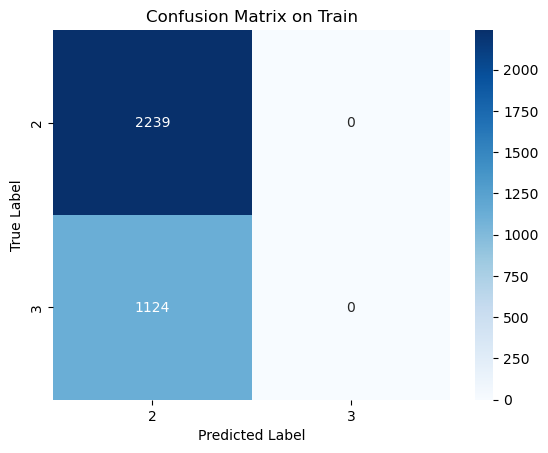

In [28]:
cm = confusion_matrix(y_train,predictions_train)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix on Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

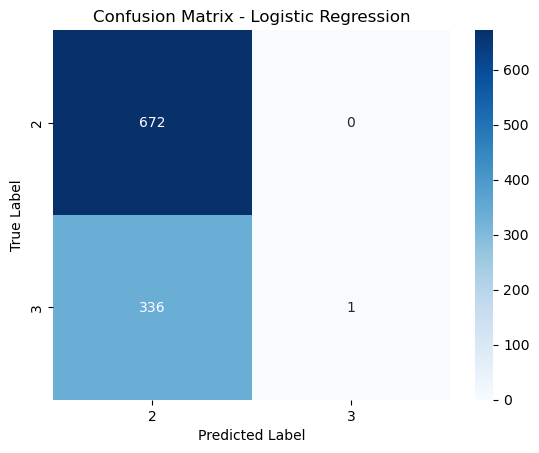

In [29]:
cm = confusion_matrix(y_val,predictions_val)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_train, predictions_train)

# Print the report
print(report)

              precision    recall  f1-score   support

           2       0.67      1.00      0.80      2239
           3       0.00      0.00      0.00      1124

    accuracy                           0.67      3363
   macro avg       0.33      0.50      0.40      3363
weighted avg       0.44      0.67      0.53      3363



/Users/enderson.santos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enderson.santos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enderson.santos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [31]:
y_val[y_val == 1]

Series([], Name: Num_Sets, dtype: int64)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy.append(accuracy_score(y_val, predictions_val))
precision.append(precision_score(y_val, predictions_val, pos_label=2))
recall.append(recall_score(y_val, predictions_val, pos_label=2))

##  Training a Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train_prepared,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [35]:
predictions_train = rnd_clf.predict(X_train_prepared)
predictions_val = rnd_clf.predict(X_val_prepared)

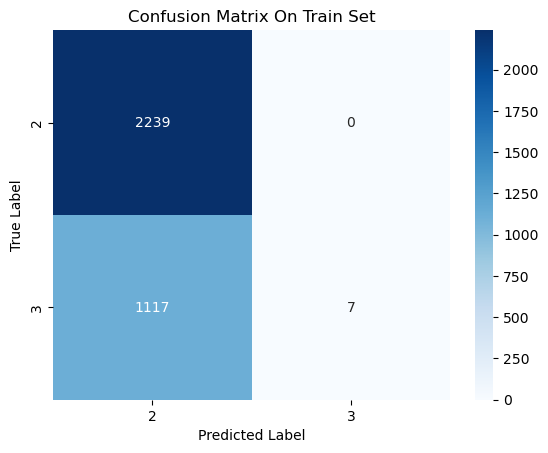

In [36]:
cm = confusion_matrix(y_train,predictions_train)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix On Train Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

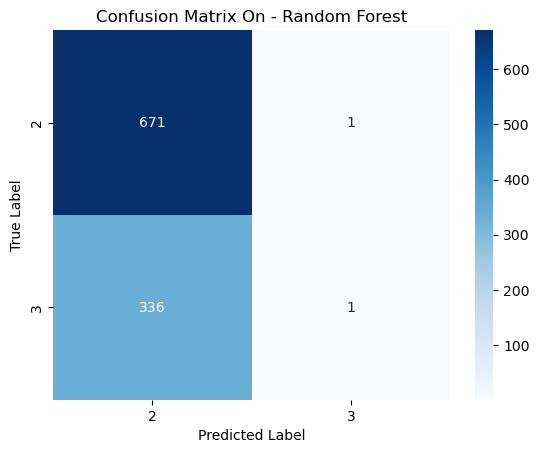

In [37]:
cm = confusion_matrix(y_val,predictions_val)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix On - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [38]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_train, predictions_train)

# Print the report
print(report)

              precision    recall  f1-score   support

           2       0.67      1.00      0.80      2239
           3       1.00      0.01      0.01      1124

    accuracy                           0.67      3363
   macro avg       0.83      0.50      0.41      3363
weighted avg       0.78      0.67      0.54      3363



In [39]:
accuracy.append(accuracy_score(y_val, predictions_val))
precision.append(precision_score(y_val, predictions_val, pos_label=2))
recall.append(recall_score(y_val, predictions_val, pos_label=2))

## XG-Boost 

In [57]:
import xgboost as xgb

In [58]:
to_map = {2:0, 3:1}
Y_train = y_train.map(to_map)
Y_val = y_val.map(to_map)

In [59]:
model = xgb.XGBClassifier(random_state=42, max_depth=3, min_child_weight=1, gamma=0.05, subsample=0.8, colsample_bytree=0.8,n_estimators=75)

In [60]:
model.fit(X_train_prepared, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [61]:
predictions_train = model.predict(X_train_prepared)
predictions_val = model.predict(X_val_prepared)

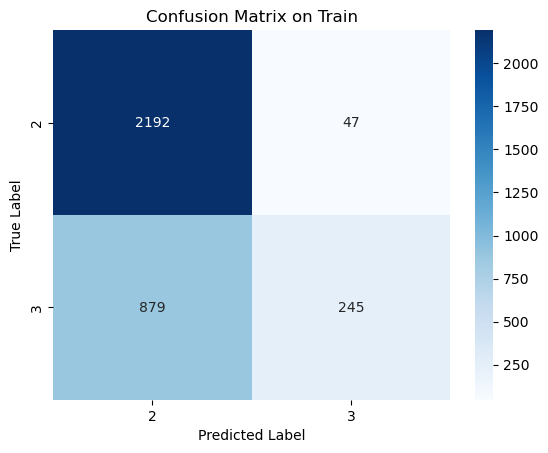

In [62]:
cm = confusion_matrix(Y_train,predictions_train)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix on Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [63]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_train, predictions_train)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.71      0.98      0.83      2239
           1       0.84      0.22      0.35      1124

    accuracy                           0.72      3363
   macro avg       0.78      0.60      0.59      3363
weighted avg       0.76      0.72      0.67      3363



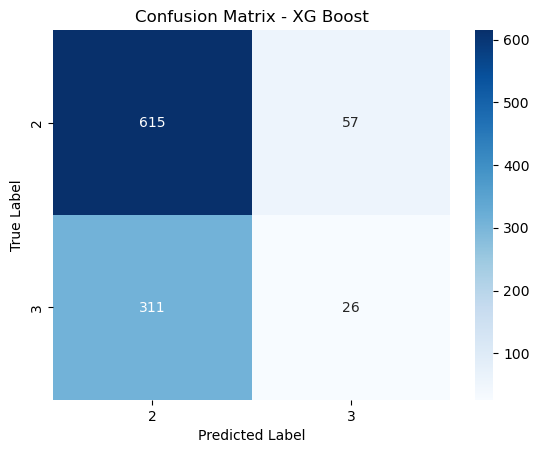

In [64]:
cm = confusion_matrix(Y_val,predictions_val)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix - XG Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [65]:
accuracy.append(accuracy_score(Y_val, predictions_val))
precision.append(precision_score(Y_val, predictions_val))
recall.append(recall_score(Y_val, predictions_val))

### XG-Boost with Cross Validation 

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_prepared, Y_train, cv=5)
print("XG-Boost")
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

XG-Boost
Cross-validation scores: [0.64041605 0.63150074 0.63744428 0.61011905 0.63839286]
Average score: 0.6315745949196916


In [67]:
model = xgb.XGBClassifier()

## Fine and Tuning XG-Boost

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'n_estimators': [25, 50, 75, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train_prepared, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01,
                                                          0.001],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [25, 50, 75, 100, 200,
                                                         300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [69]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'subsample': 0.8, 'n_estimators': 25, 'max_depth': 4, 'learning_rate': 0.001, 'colsample_bytree': 0.8}
Best score: 0.6657751362060426


In [70]:
model = xgb.XGBClassifier(**best_params)

In [71]:
model.fit(X_train_prepared, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

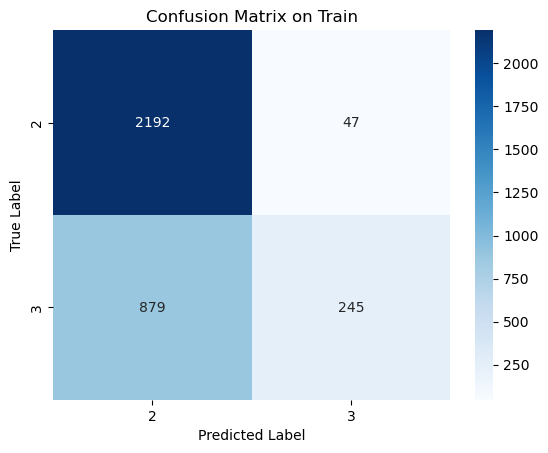

In [72]:
cm = confusion_matrix(Y_train,predictions_train)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix on Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [73]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_train, predictions_train)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.71      0.98      0.83      2239
           1       0.84      0.22      0.35      1124

    accuracy                           0.72      3363
   macro avg       0.78      0.60      0.59      3363
weighted avg       0.76      0.72      0.67      3363



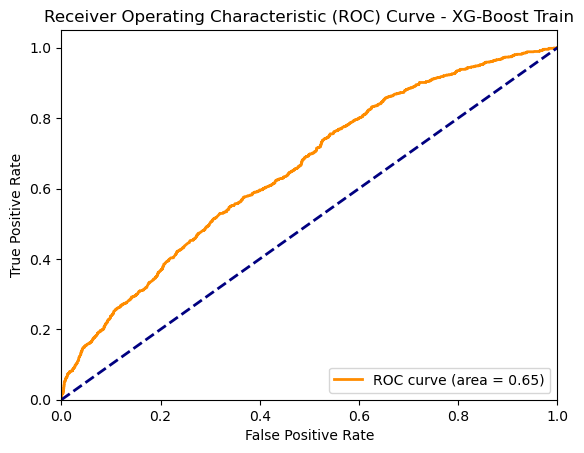

In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Obtain predicted probabilities for the positive class
y_pred_probs = model.predict_proba(X_train_prepared)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_train, y_pred_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XG-Boost Train')
plt.legend(loc="lower right")
plt.show()


In [75]:
# Calculate AUC
auc = roc_auc_score(Y_train, y_pred_probs)

print("AUC:", auc)

AUC: 0.6523678831583113


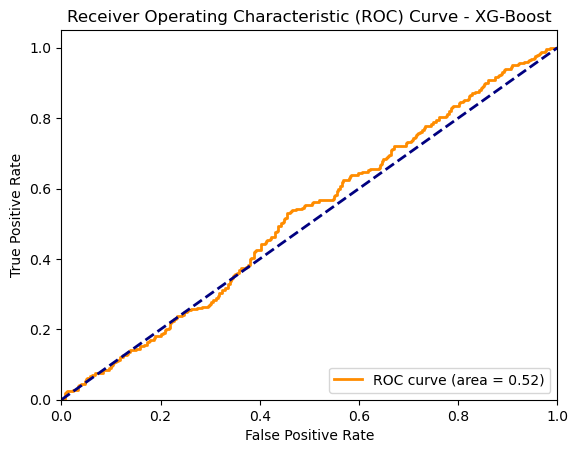

In [213]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain predicted probabilities for the positive class
y_pred_probs = model.predict_proba(X_val_prepared)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_val, y_pred_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XG-Boost')
plt.legend(loc="lower right")
plt.show()


In [81]:
# Calculate AUC
auc = roc_auc_score(Y_val, y_pred_probs)

print("AUC:", auc)

AUC: 0.5226702698883707


## Feature Importance 

In [79]:
all_attributes = cat_attributes + num_attributes
all_attributes

['Ground',
 'Prize',
 'GameRound',
 'Tornament_Days',
 'Rank_Diff',
 'Height_diff',
 'Weight_diff',
 'Turned_pro_diff',
 'age_diff']

In [82]:
X_train_dummie = pd.get_dummies(X_train[all_attributes]) 
std = StandardScaler()
X_num_scaled = std.fit_transform(X_train_dummie[num_attributes])
X_train_dummie[num_attributes] = X_num_scaled

In [84]:
model = xgb.XGBClassifier(random_state=42, max_depth=3, min_child_weight=1, gamma=0.05, subsample=0.8, colsample_bytree=0.8,n_estimators=75)

model.fit(X_train_dummie, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [85]:
xgb_feature_importance = pd.DataFrame(model.feature_importances_)
xgb_feature_importance.index = model.feature_names_in_ 
xgb_feature_importance.columns = ["Feature Importance"]
xgb_feature_importance.sort_values("Feature Importance", ascending=False).head(30).round(2)

,Feature Importance
Rank_Diff,0.11
GameRound,0.10
Height_diff,0.10
Turned_pro_diff,0.09
Ground_Hard,0.09
age_diff,0.09
Tornament_Days,0.09
Ground_Clay,0.08
Prize,0.08
Weight_diff,0.08


## SVM

In [214]:
from sklearn.svm import SVC

In [215]:
clf = SVC(kernel='sigmoid')

In [216]:
clf.fit(X_train_prepared, Y_train)

SVC(kernel='sigmoid')

In [217]:
# O training data
predictions_train = clf.predict(X_train_prepared)

#On val data
predictions_val = clf.predict(X_val_prepared)

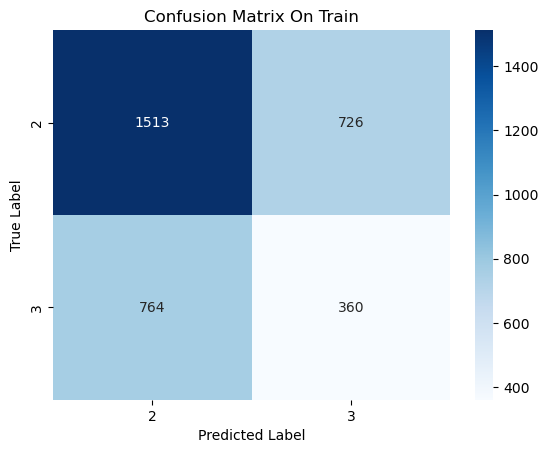

In [218]:
cm = confusion_matrix(Y_train,predictions_train)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix On Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [199]:
# Generate a classification report
report = classification_report(Y_train, predictions_train)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2239
           1       0.33      0.32      0.33      1124

    accuracy                           0.56      3363
   macro avg       0.50      0.50      0.50      3363
weighted avg       0.55      0.56      0.55      3363



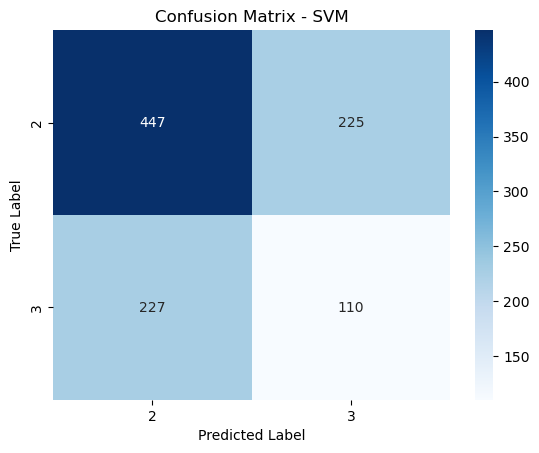

In [200]:
cm = confusion_matrix(Y_val,predictions_val)
y_train_labels = sorted(y_train.unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y_train_labels, yticklabels=y_train_labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [201]:
accuracy.append(accuracy_score(Y_val, predictions_val))
precision.append(precision_score(Y_val, predictions_val))
recall.append(recall_score(Y_val, predictions_val))

### Cross Validation with SVM

In [202]:
scores = cross_val_score(clf, X_train_prepared, y_train, cv=5)
print("SVM")
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

SVM
Cross-validation scores: [0.55869242 0.61218425 0.55869242 0.59077381 0.55357143]
Average score: 0.5747828663411874


### Fine and tune the model

In [82]:
from scipy.stats import uniform

In [84]:
clf = SVC()

In [85]:
param_grid = {
    'C': uniform(loc=0, scale=1),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [90]:
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

In [91]:
random_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb2c3edce80>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [92]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'C': 0.7879985514350598, 'gamma': 'auto', 'kernel': 'linear'}
Best score: 0.6657746939786315


In [93]:
clf = SVC(**best_params)
clf.fit(X_train_prepared, y_train)

SVC(C=0.7879985514350598, gamma='auto', kernel='linear')

## Evaluate with ROC

In [219]:
import numpy as np

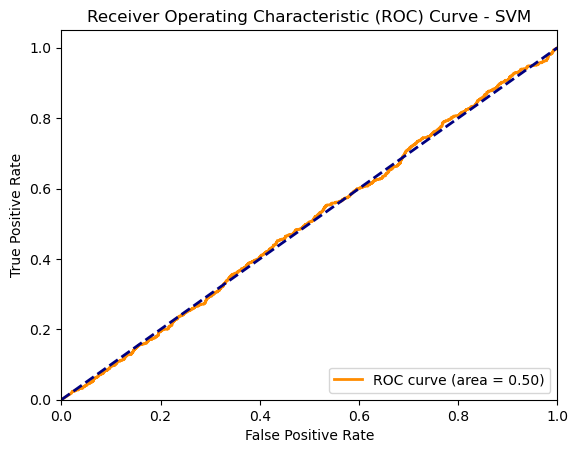

In [221]:
from sklearn.metrics import roc_curve, auc
decision_scores = clf.decision_function(X_train_prepared)

# Convert decision scores to probabilities using sigmoid function
y_pred_probs = 1 / (1 + np.exp(-decision_scores))

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_train, y_pred_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

In [146]:
pd.DataFrame(data={"Accuracy":accuracy, "Precision":precision, "Recall": recall}, index=models)

,Accuracy,Precision,Recall
Logistic Regression,0.666997,0.666667,1.000000
Random Forest,0.666997,0.666667,1.000000
XG_Boost,0.635282,0.313253,0.077151
SVM,0.552032,0.328358,0.326409
